In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('./fraudTrain.csv',index_col=0)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



index - Unique Identifier for each row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

In [3]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
train_data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
train_data.shape

(1296675, 22)

In [6]:
train_data.isna().sum().sum()

0

In [7]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
for col in train_data.columns :
    print(col," ",train_data[col].nunique())


trans_date_trans_time   1274791
cc_num   983
merchant   693
category   14
amt   52928
first   352
last   481
gender   2
street   983
city   894
state   51
zip   970
lat   968
long   969
city_pop   879
job   494
dob   968
trans_num   1296675
unix_time   1274823
merch_lat   1247805
merch_long   1275745
is_fraud   2


By comparing unique values trans_data_trans_time,trans_num,unix_time,merch_lat,merch_long

drop these columns and divide the trans time and date to new columns

In [9]:
#train_data.drop(['trans_num','unix_time','merch_lat','merch_long'],axis=1,inplace=True)

In [10]:
#split the trans_date and time columns
train_data[['trans_date','trans_time']] = train_data['trans_date_trans_time'].str.split(' ',expand=True)

In [11]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [12]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = pd.to_datetime(train_data['trans_date'])
#train_data['trans_time'] = pd.to_datetime(train_data['trans_time'],format='%H:%M:%S')

In [13]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [14]:
train_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object
dtype: object

In [15]:
train_data['trans_date'].nunique()

537

In [16]:
train_data['trans_time'].nunique()

86400

In [17]:
fraud_count_by_date = train_data[train_data['is_fraud'] == 1].groupby('trans_date')['is_fraud'].count().reset_index()
fraud_count_by_date = fraud_count_by_date.sort_values(by='is_fraud', ascending=False)
fraud_count_by_date.head()

,trans_date,is_fraud
52,2019-02-25,50
55,2019-02-28,44
39,2019-02-12,44
132,2019-05-20,44
169,2019-06-29,43


In [18]:
# Extract the month names from the 'trans_date' column
train_data['trans_month'] = train_data['trans_date'].dt.strftime('%B')

# Group by 'trans_month' and calculate the counts for fraud and total transactions
fraud_and_total_counts = train_data.groupby('trans_month')['is_fraud'].agg(['sum', 'count']).reset_index()
fraud_and_total_counts.rename(columns={'sum': 'fraud_count', 'count': 'total_transactions'}, inplace=True)

# Create a new DataFrame to store the results
monthly_fraud = pd.DataFrame({
    'Month': fraud_and_total_counts['trans_month'],
    'Fraud Occurrences': fraud_and_total_counts['fraud_count'],
    'Total Transactions': fraud_and_total_counts['total_transactions']
})

In [19]:
monthly_fraud['percentage'] = (monthly_fraud['Fraud Occurrences'] / monthly_fraud['Total Transactions'] )*100

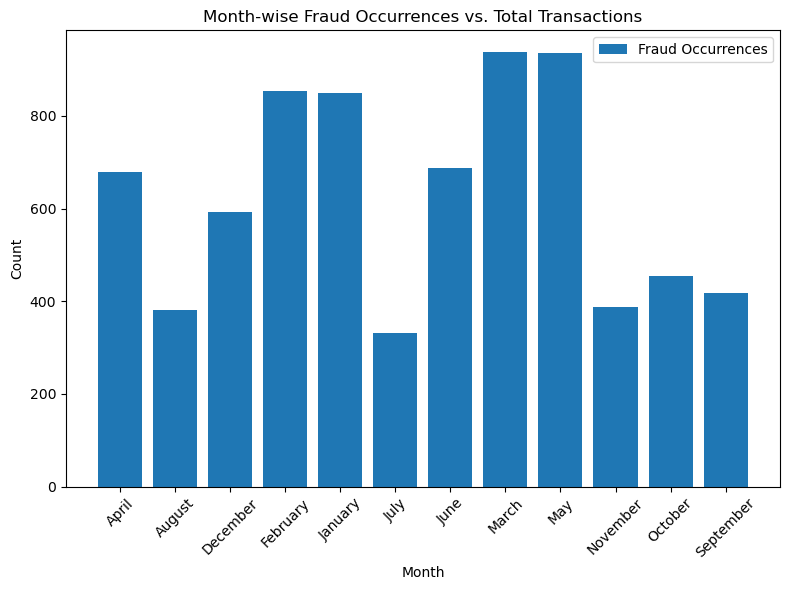

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(monthly_fraud['Month'], monthly_fraud['Fraud Occurrences'], label='Fraud Occurrences')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise Fraud Occurrences vs. Total Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()

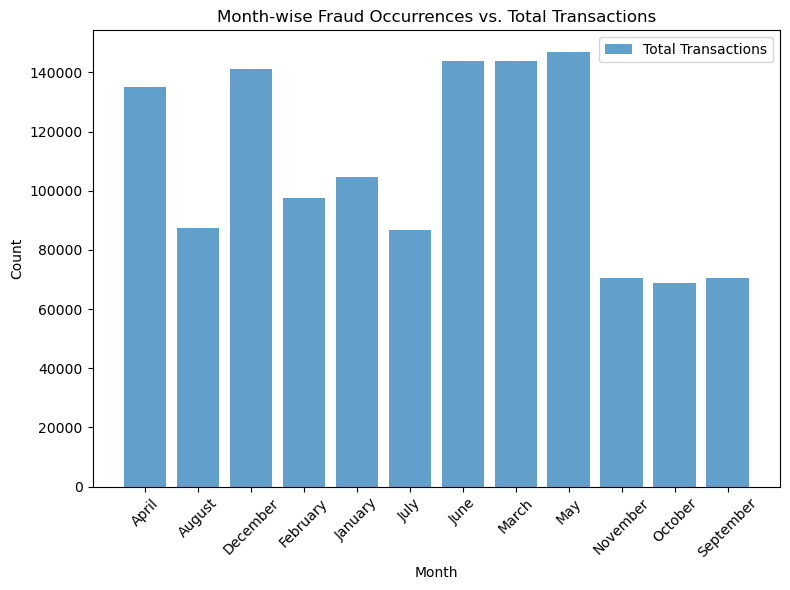

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(monthly_fraud['Month'], monthly_fraud['Total Transactions'], label='Total Transactions', alpha=0.7)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise Fraud Occurrences vs. Total Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()

In [22]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'trans_month'],
      dtype='object')

In [23]:
#drop cols
#train_data.drop(['trans_date_trans_time','merchant','street','lat','long'],axis=1,inplace=True)

In [24]:
for col in train_data.columns :
    print(col," ",train_data[col].nunique())

trans_date_trans_time   1274791
cc_num   983
merchant   693
category   14
amt   52928
first   352
last   481
gender   2
street   983
city   894
state   51
zip   970
lat   968
long   969
city_pop   879
job   494
dob   968
trans_num   1296675
unix_time   1274823
merch_lat   1247805
merch_long   1275745
is_fraud   2
trans_date   537
trans_time   86400
trans_month   12


In [25]:
def convertTime(time):
    try:
        # Split the time by colon and get the hour part
        hour = int(time.split(':')[0])

        # Define the time ranges for each period
        morning = range(6, 12)
        afternoon = range(12, 18)
        evening = range(18, 22)
        night = list(range(22, 24)) + list(range(0, 6))

        # Check which period the hour belongs to and return the corresponding string
        if hour in morning:
            return 'morning'
        elif hour in afternoon:
            return 'afternoon'
        elif hour in evening:
            return 'evening'
        elif hour in night:
            return 'night'
        else:
            return 'unknown'  # Handle cases where the hour doesn't match any period
    except:
        return 'invalid'  # Handle any errors in the input format

train_data['trans_day'] = train_data['trans_time'].astype(str).apply(lambda x: convertTime(x))


In [26]:
train_data['trans_day'].unique()

array(['night', 'morning', 'afternoon', 'evening'], dtype=object)

In [27]:
# Assuming 'dob' is in the format 'YYYY-MM-DD' as a string
# Calculate the current date
# Calculate age by subtracting 'dob' from the current date and extracting years
# Now, the 'age' column contains the age of individuals

import datetime
train_data['dob'] = pd.to_datetime(train_data['dob'])  
current_date = datetime.datetime.now()
train_data['age'] = (current_date - train_data['dob']).astype('<m8[Y]')

In [28]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_month,trans_day,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,January,night,35.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,January,night,45.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,January,night,61.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,January,night,56.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,January,night,37.0


In [29]:
train_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time', 'trans_month',
       'trans_day', 'age'],
      dtype='object')

In [30]:
for col in train_data.columns :
    print(col," ",train_data[col].nunique()," ")

trans_date_trans_time   1274791  
cc_num   983  
merchant   693  
category   14  
amt   52928  
first   352  
last   481  
gender   2  
street   983  
city   894  
state   51  
zip   970  
lat   968  
long   969  
city_pop   879  
job   494  
dob   968  
trans_num   1296675  
unix_time   1274823  
merch_lat   1247805  
merch_long   1275745  
is_fraud   2  
trans_date   537  
trans_time   86400  
trans_month   12  
trans_day   4  
age   81  


In [31]:
train_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object
trans_month                      object


In [32]:
nessesery_data = train_data[['cc_num','merchant','category','amt','gender','city','state','zip','city_pop','job','dob','trans_month','trans_day','age','is_fraud']]

In [33]:
nessesery_data.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,trans_month,trans_day,age,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,January,night,35.0,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,January,night,45.0,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,January,night,61.0,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,1967-01-12,January,night,56.0,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,January,night,37.0,0


In [34]:
#category on merchant,category,gender,'city,state,zip,city_pop,job,trans_month,trans_day
import category_encoders as ce 
encoder = ce.OrdinalEncoder(cols=['merchant','category','gender','city','state','zip','city_pop','trans_month','trans_day','job','dob'])
nessesery_data = encoder.fit_transform(nessesery_data)

In [35]:
nessesery_data['job'].nunique()

494

In [36]:
nessesery_data.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,trans_month,trans_day,age,is_fraud
0,2703186189652095,1,1,4.97,1,1,1,1,1,1,1,1,1,35.0,0
1,630423337322,2,2,107.23,1,2,2,2,2,2,2,1,1,45.0,0
2,38859492057661,3,3,220.11,2,3,3,3,3,3,3,1,1,61.0,0
3,3534093764340240,4,4,45.00,2,4,4,4,4,4,4,1,1,56.0,0
4,375534208663984,5,5,41.96,2,5,5,5,5,5,5,1,1,37.0,0


In [37]:
nessesery_data.dtypes

cc_num           int64
merchant         int32
category         int32
amt            float64
gender           int32
city             int32
state            int32
zip              int32
city_pop         int32
job              int32
dob              int32
trans_month      int32
trans_day        int32
age            float64
is_fraud         int64
dtype: object

array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'merchant'}>,
        <Axes: title={'center': 'category'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'job'}>, <Axes: title={'center': 'dob'}>,
        <Axes: title={'center': 'trans_month'}>],
       [<Axes: title={'center': 'trans_day'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

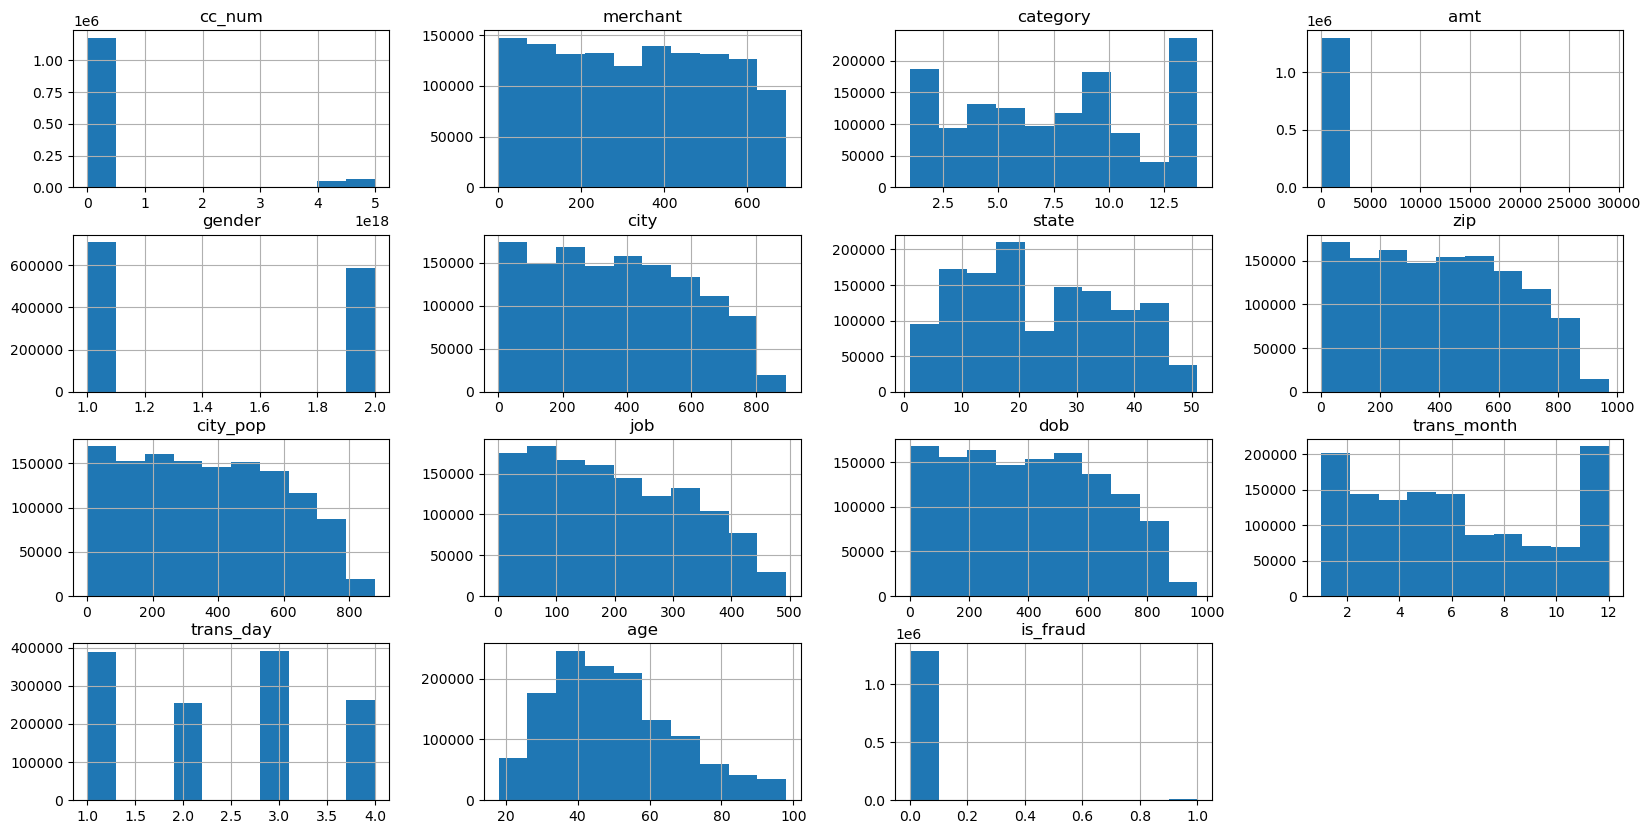

In [38]:
nessesery_data.hist(figsize=(20,10))

In [39]:
corr_matrix = nessesery_data.corr()
corr_matrix['is_fraud'].sort_values()

trans_day     -0.077054
category      -0.039249
merchant      -0.034868
trans_month   -0.012409
cc_num        -0.000981
state          0.002453
gender         0.007642
job            0.011411
age            0.012343
city_pop       0.022187
city           0.023724
dob            0.028343
zip            0.028489
amt            0.219404
is_fraud       1.000000
Name: is_fraud, dtype: float64

In [40]:
encoder = ce.OrdinalEncoder()
train_data = encoder.fit_transform(train_data)

In [41]:
train_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,trans_month,trans_day,age
0,2019-01-01 00:00:18,2703186189652095,1,1,4.97,1,1,1,1,1,...,1,1325376018,36.011293,-82.048315,0,2019-01-01,1,1,1,35.0
1,2019-01-01 00:00:44,630423337322,2,2,107.23,2,2,1,2,2,...,2,1325376044,49.159047,-118.186462,0,2019-01-01,2,1,1,45.0
2,2019-01-01 00:00:51,38859492057661,3,3,220.11,3,3,2,3,3,...,3,1325376051,43.150704,-112.154481,0,2019-01-01,3,1,1,61.0
3,2019-01-01 00:01:16,3534093764340240,4,4,45.00,4,4,2,4,4,...,4,1325376076,47.034331,-112.561071,0,2019-01-01,4,1,1,56.0
4,2019-01-01 00:03:06,375534208663984,5,5,41.96,5,5,2,5,5,...,5,1325376186,38.674999,-78.632459,0,2019-01-01,5,1,1,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,191,3,15.56,217,64,2,480,458,...,1296671,1371816728,36.841266,-111.690765,0,2020-06-21,24695,6,3,61.0
1296671,2020-06-21 12:12:19,6011149206456997,646,9,51.70,21,4,2,324,316,...,1296672,1371816739,38.906881,-78.246528,0,2020-06-21,24696,6,3,43.0
1296672,2020-06-21 12:12:32,3514865930894695,406,9,105.93,14,15,2,15,15,...,1296673,1371816752,33.619513,-105.130529,0,2020-06-21,3918,6,3,56.0
1296673,2020-06-21 12:13:36,2720012583106919,514,9,74.90,66,73,2,237,235,...,1296674,1371816816,42.788940,-103.241160,0,2020-06-21,56011,6,3,43.0


In [42]:
train_matrix = train_data.corr()
train_matrix['is_fraud'].sort_values()

trans_day     -0.077054
category      -0.039249
merchant      -0.034868
trans_month   -0.012409
unix_time     -0.005078
trans_num     -0.004767
trans_time    -0.003060
zip           -0.002162
cc_num        -0.000981
long           0.001721
merch_long     0.001721
merch_lat      0.001741
lat            0.001894
city_pop       0.002136
state          0.002453
gender         0.007642
first          0.009605
job            0.011411
last           0.012285
age            0.012343
city           0.023724
street         0.029358
amt            0.219404
is_fraud       1.000000
Name: is_fraud, dtype: float64

In [43]:
#build a model on ndata
X = nessesery_data.drop(['is_fraud'],axis=1)
Y = nessesery_data['is_fraud']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rfc_model = Pipeline([
    ('scalar',StandardScaler()),
    ('rfc',RandomForestClassifier(n_estimators=10,max_depth=9,random_state=41))
])
rfc_model.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=9, n_estimators=10,
                                        random_state=41))])

In [46]:
pred = rfc_model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("RandomForestClassifier : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,y_test))
print("Classification Report : \n",classification_report(pred,y_test))

RandomForestClassifier : 
------------------------------------------
Accuracy Score :  0.9962211039774809
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    258637
           1       0.41      0.89      0.56       698

    accuracy                           1.00    259335
   macro avg       0.70      0.94      0.78    259335
weighted avg       1.00      1.00      1.00    259335



In [124]:
from sklearn.linear_model import LogisticRegression
lr_model = Pipeline([
    ('scalar',StandardScaler()),
    ('rfc',LogisticRegression(random_state=41))
])
lr_model.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('rfc', LogisticRegression(random_state=41))])

In [125]:
pred = lr_model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("LogisticRegression : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,y_test))
print("Classification Report : \n",classification_report(pred,y_test))

LogisticRegression : 
------------------------------------------
Accuracy Score :  0.9936298609906106
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    259189
           1       0.00      0.05      0.01       146

    accuracy                           0.99    259335
   macro avg       0.50      0.52      0.50    259335
weighted avg       1.00      0.99      1.00    259335



In [126]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = Pipeline([
    ('scalar',StandardScaler()),
    ('rfc',DecisionTreeClassifier(max_depth=9,random_state=41))
])
dtc_model.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('rfc', DecisionTreeClassifier(max_depth=9, random_state=41))])

In [127]:
pred = dtc_model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("DecisionTreeClassifier : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,y_test))
print("Classification Report : \n",classification_report(pred,y_test))

DecisionTreeClassifier : 
------------------------------------------
Accuracy Score :  0.9978753349914203
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    258048
           1       0.74      0.88      0.80      1287

    accuracy                           1.00    259335
   macro avg       0.87      0.94      0.90    259335
weighted avg       1.00      1.00      1.00    259335



Now check the test_file preprocess it 

In [128]:
test_data = pd.read_csv('./fraudTest.csv',index_col=0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [129]:
test_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [130]:
test_data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [131]:
test_data.shape

(555719, 22)

In [132]:
test_data.isna().sum().sum()

0

In [133]:
for col in test_data.columns :
    print(col," ",test_data[col].nunique())


trans_date_trans_time   544760
cc_num   924
merchant   693
category   14
amt   37256
first   341
last   471
gender   2
street   924
city   849
state   50
zip   912
lat   910
long   910
city_pop   835
job   478
dob   910
trans_num   555719
unix_time   544760
merch_lat   546490
merch_long   551770
is_fraud   2


In [134]:
#split the trans_date and time columns
test_data[['trans_date','trans_time']] = test_data['trans_date_trans_time'].str.split(' ',expand=True)

In [135]:
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


In [136]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date'] = pd.to_datetime(test_data['trans_date'])
#train_data['trans_time'] = pd.to_datetime(train_data['trans_time'],format='%H:%M:%S')

In [137]:
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


In [138]:
test_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
trans_time                       object
dtype: object

In [139]:
test_data['trans_month'] = test_data['trans_date'].dt.strftime('%B')

In [140]:
test_data['trans_day'] = test_data['trans_time'].astype(str).apply(lambda x: convertTime(x))


In [141]:
test_data['trans_day'].unique()

array(['afternoon', 'evening', 'night', 'morning'], dtype=object)

In [142]:
import datetime
test_data['dob'] = pd.to_datetime(test_data['dob'])  
current_date = datetime.datetime.now()
test_data['age'] = (current_date - test_data['dob']).astype('<m8[Y]')

In [143]:
test_ness = test_data[['cc_num','merchant','category','amt','gender','city','state','zip','city_pop','job','dob','trans_month','trans_day','age','is_fraud']]

In [144]:
test_ness.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,trans_month,trans_day,age,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,333497,Mechanical engineer,1968-03-19,June,afternoon,55.0,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,302,"Sales professional, IT",1990-01-17,June,afternoon,33.0,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,34496,"Librarian, public",1970-10-21,June,afternoon,52.0,0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,54767,Set designer,1987-07-25,June,afternoon,36.0,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,1126,Furniture designer,1955-07-06,June,afternoon,68.0,0


In [145]:
encoder = ce.OrdinalEncoder(cols=['merchant','category','gender','city','state','zip','city_pop','trans_month','trans_day','job','dob'])
test_ness = encoder.fit_transform(test_ness)

In [146]:
test_ness.head()

,cc_num,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,trans_month,trans_day,age,is_fraud
0,2291163933867244,1,1,2.86,1,1,1,1,1,1,1,1,1,55.0,0
1,3573030041201292,2,1,29.84,2,2,2,2,2,2,2,1,1,33.0,0
2,3598215285024754,3,2,41.28,2,3,3,3,3,3,3,1,1,52.0,0
3,3591919803438423,4,3,60.05,1,4,4,4,4,4,4,1,1,36.0,0
4,3526826139003047,5,4,3.19,1,5,5,5,5,5,5,1,1,68.0,0


In [147]:
X = test_ness.drop(['is_fraud'],axis=1)
Y = test_ness['is_fraud']

In [148]:
pred = rfc_model.predict(X)

from sklearn.metrics import accuracy_score,classification_report
print("RandomForestClassifier : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,Y))
print("Classification Report : \n",classification_report(pred,Y))

RandomForestClassifier : 
------------------------------------------
Accuracy Score :  0.9959565895713481
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    555295
           1       0.08      0.38      0.13       424

    accuracy                           1.00    555719
   macro avg       0.54      0.69      0.56    555719
weighted avg       1.00      1.00      1.00    555719



In [149]:
pred = lr_model.predict(X)

from sklearn.metrics import accuracy_score,classification_report
print("LogisticRegression : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,Y))
print("Classification Report : \n",classification_report(pred,Y))

LogisticRegression : 
------------------------------------------
Accuracy Score :  0.9953897563336866
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    555302
           1       0.00      0.00      0.00       417

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      1.00      1.00    555719



In [150]:
pred = dtc_model.predict(X)

from sklearn.metrics import accuracy_score,classification_report
print("DecisionTreeClassifier : ")
print("------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred,Y))
print("Classification Report : \n",classification_report(pred,Y))

DecisionTreeClassifier : 
------------------------------------------
Accuracy Score :  0.9936496682675957
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553825
           1       0.12      0.13      0.13      1894

    accuracy                           0.99    555719
   macro avg       0.56      0.57      0.56    555719
weighted avg       0.99      0.99      0.99    555719



Now our model is good
